## Unequal Narratives? Investigating Media Bias in the Israel-Palestine Conflict

Subtopics:
1. Sentiment Analysis and Keyword Frequency of Headlines
2. Event Salience: Coverage vs. Casualties
3. Comparative Outlet Ideology

### Installation of requirements. 

The following cell contains all the necessary dependencies needed for this project.

* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`scikit-learn`](https://scikit-learn.org/stable/) is a Python package with different machinelearning algorithms. [Here](https://scikit-learn.org/stable/modules/classes.html) is the documentation of `sklearn`.
* [`seaborn`](https://seaborn.pydata.org/) is a Python package based on matplotlib that simplifies data visualization and works well with pandas DataFrames.
* [`nltk`](https://www.nltk.org/) is a Python package for working with natural language processing tasks. It includes tools for tokenization, stemming, and other NLP techniques.
* [`vaderSentiment`](https://pypi.org/project/vaderSentiment/) is a Python library for sentiment analysis. It is particularly good for short texts like social media posts or headlines.
* [`transformers`](https://pypi.org/project/transformers/) is a Python library by Hugging Face for using pre-trained transformer models (like BERT, GPT, etc.) for various NLP tasks. 
* [`torch`](https://pytorch.org/) is aPython package for deep learning and machine learning. It's used as a backend for models like BERT and other neural network models.
* [`spacy`](https://spacy.io/) is an open-source Python library for advanced natural language processing. It provides tools for tokenization, part-of-speech tagging, named entity recognition, dependency parsing, and more, designed for fast and efficient text analysis.  
* [`wordcloud`](https://pypi.org/project/wordcloud/) is a Python library for creating visually appealing word clouds from text data. It highlights the frequency of words by adjusting their size, making it an intuitive way to visualize text prominence and patterns.
* [`tf.keras`](https://www.tensorflow.org/api_docs/python/tf/keras) is a high-level API for building and training deep learning models within the TensorFlow framework. It provides user-friendly tools for creating neural networks, including layers, optimizers, and loss functions, with seamless integration for deployment and scalability.

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install seaborn
! pip install nltk vaderSentiment transformers
! pip install torch transformers
! pip install spacy
! pip install wordcloud
! pip install tf_keras

### Import requirements
The cell below imports all necessary dependancies.

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and computations
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import matplotlib.dates as mdates  # For formatting and manipulating dates in plots
import seaborn as sns  # For enhanced visualizations based on Matplotlib
import itertools  # For efficient looping and combination generation
import spacy  # For natural language processing
spacy.cli.download("en_core_web_sm")  # Downloading the small English language model for SpaCy

from wordcloud import WordCloud  # For generating visually appealing word clouds
from collections import Counter, defaultdict  # For working with counter objects and creating default dictionaries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # For sentiment analysis using VADER
from transformers import pipeline  # For leveraging pre-trained transformer models

## Data Preparation and Preprocessing

### Data cleaning

Link for the search query: [`Media Cloud Search Query`](https://search.mediacloud.org/search?qs=israe*%2520OR%2520palestin*%2520OR%2520hamas%2520OR%2520IDF&start=10-07-2023&end=01-07-2024&p=onlinenews-mediacloud&ss=1092%252C1%252C1095%252C7%252C2%252C101&cs=&any=any&name=israe*%20OR%20palestin*%20OR%20hamas%20OR%20IDF&edit=false) 

We obtained our dataset using the link above. We limited the query to 6 media outlets, one year time (07-10-2023 - 07-10-2024), and specified keywords that needed to be included in the articles that came up.


In [3]:
file_path = '../data/data.csv'
data = pd.read_csv(file_path)
data

,id,indexed_date,language,media_name,media_url,publish_date,title,url
0,609b49fdea2e02b3da9be8594a1e71daf839cc31cf184d...,2025-01-06 18:18:20.886953,en,nytimes.com,nytimes.com,2024-10-07,"Campuses Are Calmer, but They Are Not Normal, ...",https://www.nytimes.com/2024/10/07/us/campus-c...
1,e88291a5c2b82ede03a526071c1d1b8fa77e23fcec1edd...,2024-10-07 18:24:01.615866,en,nypost.com,nypost.com,2024-10-07,"Trump hints that he’s open to Richard Grenell,...",https://nypost.com/2024/10/07/us-news/donald-t...
2,f810fcfd715f8c7412f8da51c992b140f6db253abac936...,2024-10-07 13:28:40.202129,en,foxnews.com,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...,https://www.foxnews.com/world/hezbollah-rocket...
3,a360fa0abf34985b9a1db2e169dd9349f8e4e60d559e9f...,2024-10-07 23:23:57.316841,en,nypost.com,nypost.com,2024-10-07,"Kamala Harris, Emhoff plant tree for Oct. 7 vi...",https://nypost.com/2024/10/07/us-news/kamala-h...
4,1a06b76f8c6516a469b4a32a2f898b595487018e380483...,2024-10-08 06:33:09.401765,en,cnn.com,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...,https://www.cnn.com/2024/10/07/world/video/the...
...,...,...,...,...,...,...,...,...
25261,fb62dcff0bed5b4e07b6f3b453d399033142b144178a46...,2024-02-19 16:45:53.602867,en,washingtonpost.com,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...,https://www.washingtonpost.com/opinions/2023/1...
25262,b68f94c49afee4ad2427bc4a5a0a0a15d9ce67bf45b4fe...,2024-02-19 16:10:13.944341,en,nytimes.com,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...,https://www.nytimes.com/2023/10/07/world/middl...
25263,435cd12f57471cb4753902a4a4ea17cbaec8754465f728...,2024-02-19 17:45:25.642968,en,nytimes.com,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade,https://www.nytimes.com/2023/10/07/world/middl...
25264,682b2869c252ea3d5e134e14452bac72cf50db359fd156...,2024-02-19 17:15:09.644319,en,washingtontimes.com,washingtontimes.com,2023-10-07,Biden ready to offer ‘all means of appropriate...,https://www.washingtontimes.com/news/2023/oct/...


Filtering by keywords: We check if the title column contains any of the needed words, ignoring case sensitivity and handling missing values.

In [4]:
# chosen keywords
keywords = ["Gaza", "Israel", "Palestine", "West Bank", "Palestinian", "Hamas", "IDF", "Hezbollah", "Israeli"]
data_filtered = data[data['title'].str.contains('|'.join(keywords), case=False, na=False)]
data_filtered = data_filtered[data_filtered['language'] == 'en']

# Drop the 'id' and 'language' columns
data_cleaned = data_filtered.drop(columns=['id', 'indexed_date', 'language', 'media_url', 'url'])

data_cleaned = data_cleaned.rename(columns={
    "media_name": "Media Name",
    "publish_date": "Publish Date",
    "title": "Title",
})

cleaned_file_path = '../data/data_cleaned_filtered.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

data_cleaned

,Media Name,Publish Date,Title
2,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...
4,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...
6,cnn.com,2024-10-07,Family member of Israeli hostages: ‘We never l...
7,nypost.com,2024-10-07,Israel establishes new military zone around Le...
10,nypost.com,2024-10-07,Oct. 7 anniversary live updates: Thousands of ...
...,...,...,...
25258,nytimes.com,2023-10-07,‘The Children Were Terrified.’ Fear Grips Isra...
25261,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...
25262,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...
25263,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade


### Analysis of Media Coverage
The bar chart below illustrates the number of posts published by six major US media outlets (CNN, NBC, NY Post, NY Times, Fox, and Wall Street Journal) related to Gaza, Israel, or Palestine during the selected timeframe. This analysis highlights variations in the volume of coverage among these outlets, offering insights into their reporting focus on the topic.

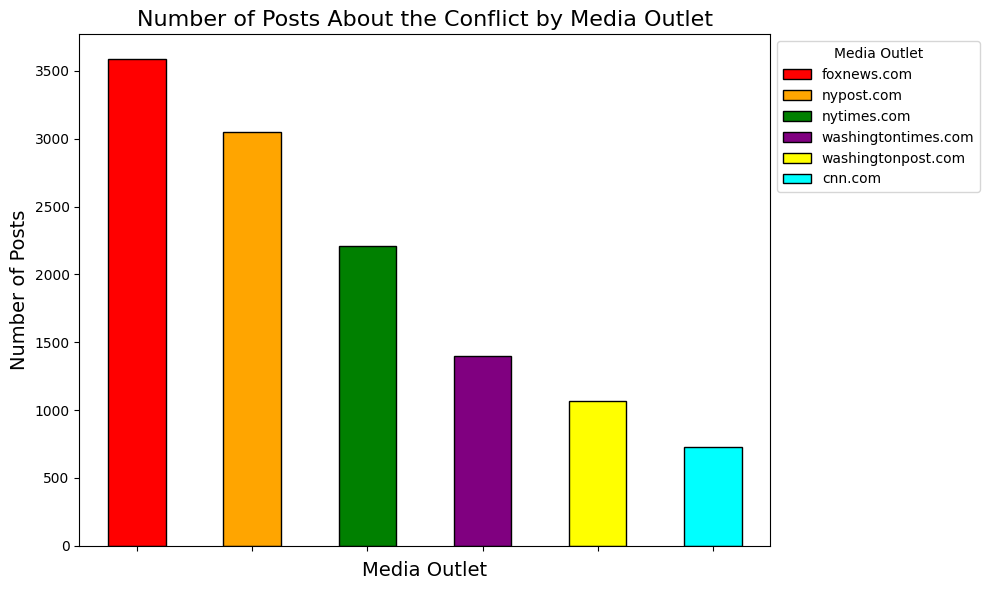

In [5]:
# Count the number of posts for each media outlet
media_counts = data_cleaned['Media Name'].value_counts()

# Define a specific color mapping for each media outlet
color_map = {
    'foxnews.com': 'red',
    'cnn.com': 'cyan',
    'nytimes.com': 'green',
    'washingtontimes.com': 'purple',
    'nypost.com': 'orange',
    'washingtonpost.com': 'yellow'
}

# Create a list of colors according to the color_map
colors = media_counts.index.map(color_map)

# Create the plot with specific colors
plt.figure(figsize=(10, 6))
bars = media_counts.plot(kind='bar', color=colors, edgecolor='black')

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Number of Posts About the Conflict by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts)), labels=[""] * len(media_counts))
plt.legend(bars.patches, media_counts.index, title='Media Outlet', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The function `clean_media_data` reads a CSV file containing media data, filters it to include only English-language entries, and drops unnecessary columns for streamlined analysis. The function then renames specific columns to more descriptive labels and counts the number of entries per media outlet, printing the results. Finally, it returns the cleaned DataFrame.

In [6]:
def clean_media_data(file_path):
    """
    Reads and cleans a CSV of media data, filters for English entries,
    renames columns, counts media entries and returns the cleaned DataFrame.
    """
    data = pd.read_csv(file_path)
    
    # Drop unnecessary columns
    data_cleaned = data[data['language'] == 'en']
    data_cleaned = data_cleaned.drop(columns=['id', 'indexed_date', 'media_url', 'url', 'language'])
    
    data_cleaned = data_cleaned.rename(columns={
        "media_name": "Media Name",
        "publish_date": "Publish Date",
        "title": "Title",
    })

    # Count the number of entries by media name
    media_counts = data_cleaned['Media Name'].value_counts()
    
    # Print the number of entries for each media outlet
    for media, count in media_counts.items():
        print(f"Number of entries for {media}: {count}")
    
    return data_cleaned

Read in the news CSV files from our chosen media outlets.

In [7]:
fox_file_path = '../data/fox.csv'
fox_cleaned = clean_media_data(fox_file_path)

cnn_file_path = '../data/cnn.csv'
cnn_cleaned = clean_media_data(cnn_file_path)

nypost_file_path = '../data/nypost.csv'
nypost_cleaned = clean_media_data(nypost_file_path)

nytimes_file_path = '../data/nytimes.csv'
nytimes_cleaned = clean_media_data(nytimes_file_path)

washingtonpost_file_path = '../data/washingtonpost.csv'
washingtonpost_cleaned = clean_media_data(washingtonpost_file_path)

washingtontimes_file_path = '../data/washingtontimes.csv'
washingtontimes_cleaned = clean_media_data(washingtontimes_file_path)


Number of entries for foxnews.com: 52599
Number of entries for cnn.com: 9351
Number of entries for nypost.com: 71485
Number of entries for nytimes.com: 43011
Number of entries for washingtonpost.com: 16747
Number of entries for washingtontimes.com: 29683


This code segment performs a comparative analysis of media coverage by normalizing conflict-related entries against total entries for each media outlet. It calculates a normalized ratio for each outlet by dividing the number of conflict entries by the total entries, then visualizes the data using a bar chart. The chart compares normalized values across media outlets.

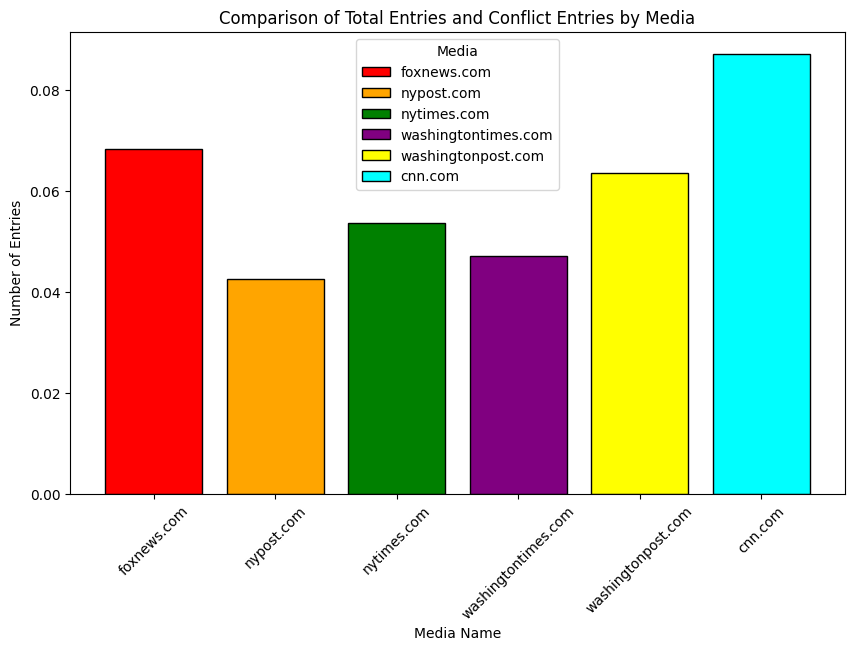

In [8]:
total_entries = {
    'foxnews.com': 52599,
    'cnn.com': 9351,
    'nypost.com': 71485,
    'nytimes.com': 43011,
    'washingtonpost.com': 16747,
    'washingtontimes.com': 29683
}

conflict_entries = {
    'foxnews.com': 3590,
    'nypost.com': 3048,
    'nytimes.com': 2312,
    'washingtontimes.com': 1398,
    'washingtonpost.com': 1066,
    'cnn.com': 815
}

normalized_data = {
    key: conflict_entries[key] / total_entries[key]
    for key in conflict_entries
}

fig, ax = plt.subplots(figsize=(10, 6))
for media in normalized_data:
    ax.bar(media, normalized_data[media], color=color_map[media], label=media, edgecolor='black')

ax.set_xlabel('Media Name')
ax.set_ylabel('Number of Entries')
ax.set_title('Comparison of Total Entries and Conflict Entries by Media')
ax.legend(title='Media')
plt.xticks(rotation=45)
plt.show()

## 1 Sentiment Analysis and Keyword Frequency of Headlines

### 1.1 Sentiment Score calculations

This plot shows the average sentiment score for each media outlet, with different colors representing each outlet. It provides an overview of the tone (positive, neutral, or negative) in the media's reporting on the Israel-Palestine conflict.


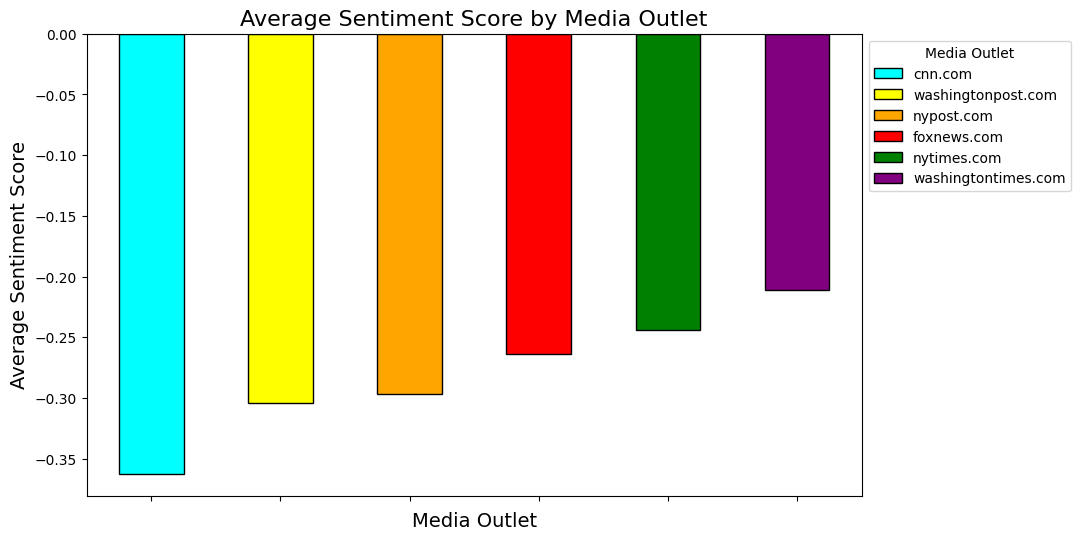

In [9]:
analyzer = SentimentIntensityAnalyzer()

data_cleaned['Sentiment Score'] = data_cleaned['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data_cleaned

avg_sentiment_by_outlet = data_cleaned.groupby('Media Name')['Sentiment Score'].mean().sort_values()

# Create a list of colors according to the color_map
colors = avg_sentiment_by_outlet.index.map(color_map)

# Plot the average sentiment by outlet with specific colors
plt.figure(figsize=(10, 6))
bars = avg_sentiment_by_outlet.plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Average Sentiment Score by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts)), labels=[""] * len(media_counts))
plt.legend(bars.patches, avg_sentiment_by_outlet.index, title='Media Outlet', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The following plot allows us to observe how the sentiment regarding the Israel-Palestine conflict has changed over time, providing insights into the tone of media coverage on a monthly basis.

In [10]:
# Define special events and their colors
special_events = {
    "7th October Attack": ("2023-10-07", "red"),
    "Al Ahli Hospital Attack": ("2023-10-17", "orange"),
    "Rafah Border Bombing": ("2023-11-01", "green"),
    "Khan Younis Massacre": ("2023-12-10", "purple"),
    "Refugee Camp Airstrike": ("2024-07-08", "black"),
}

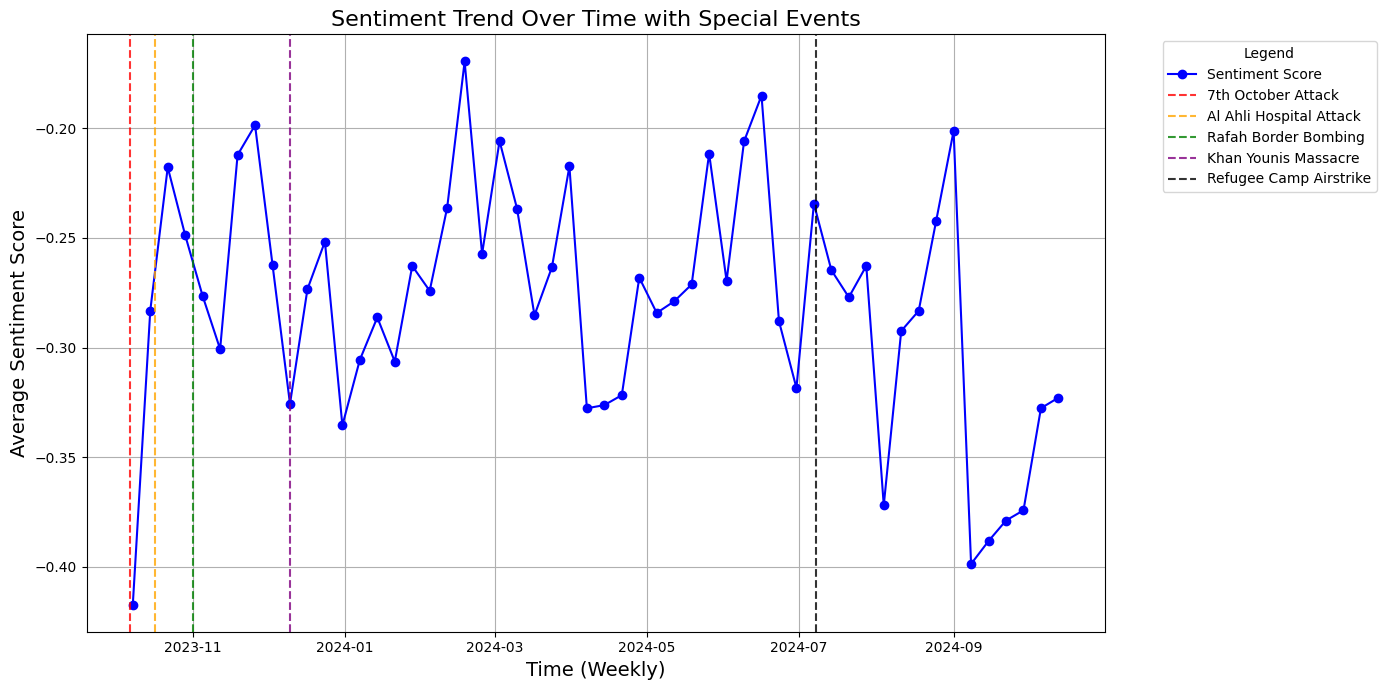

In [11]:
data_cleaned['Publish Date'] = pd.to_datetime(data_cleaned['Publish Date'], errors='coerce')
data_cleaned = data_cleaned.reset_index(drop=True)

# Calculate average sentiment score by week
sentiment_over_time = data_cleaned.resample('W', on='Publish Date')['Sentiment Score'].mean()

# Convert event dates to pandas Timestamps
special_event_dates = {label: (pd.Timestamp(date), color) for label, (date, color) in special_events.items()}

# Plot sentiment over time
plt.figure(figsize=(14, 7))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o', color='blue', label='Sentiment Score')

# Add vertical lines for special events
for event, (date, color) in special_event_dates.items():
    plt.axvline(x=date, color=color, linestyle='--', alpha=0.8, label=event)

plt.xlabel("Time (Weekly)", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Sentiment Trend Over Time with Special Events", fontsize=16)
plt.grid()
plt.legend(title="Legend", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The following plot shows how the sentiment has changed over time for each media outlet separately. 

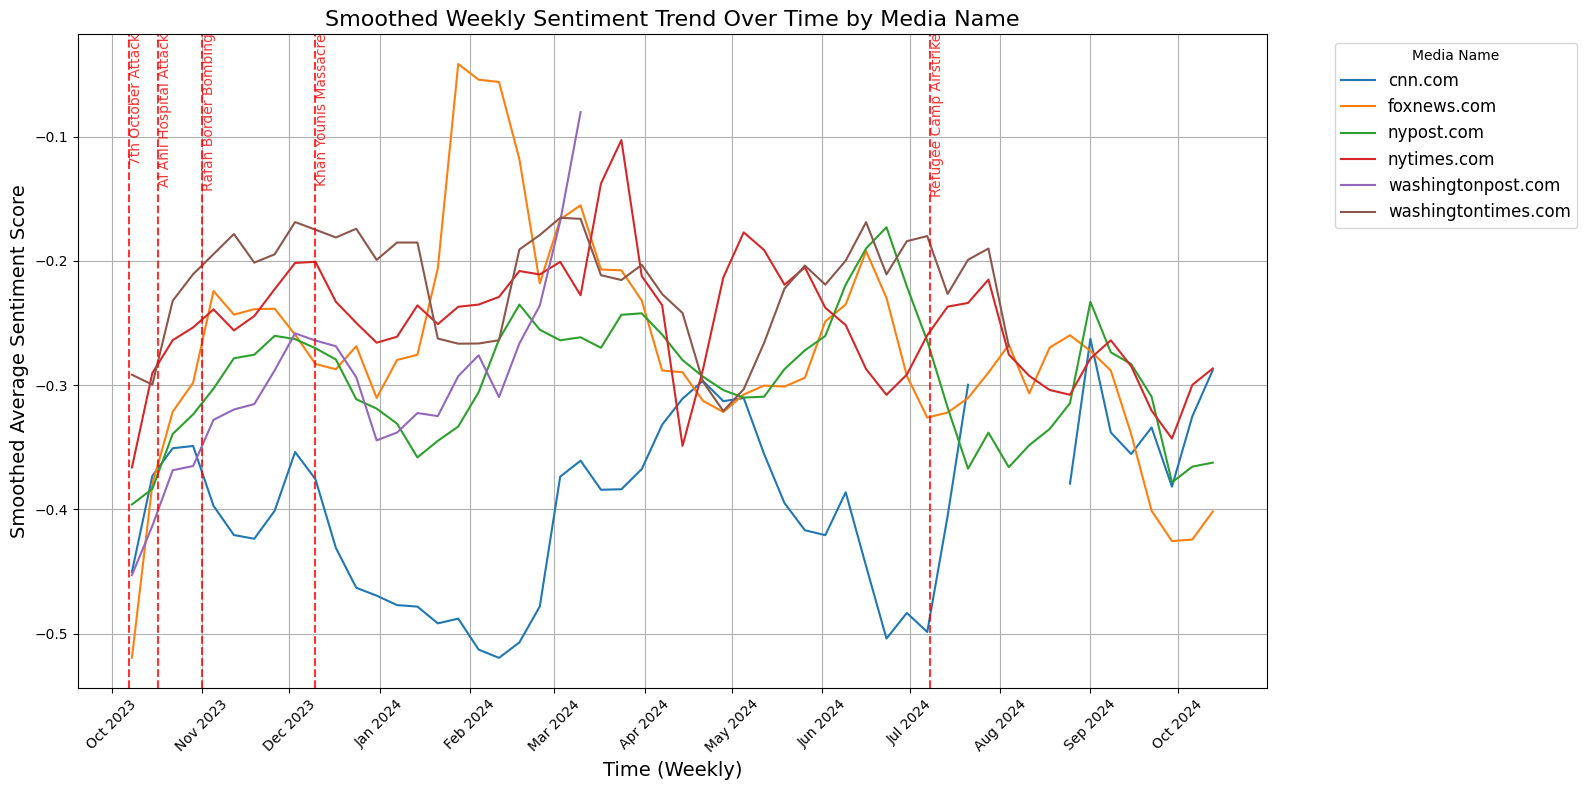

In [12]:
# Group by Media Name and resample by day to calculate average sentiment score
sentiment_weekly = data_cleaned.groupby('Media Name').resample('W', on='Publish Date')['Sentiment Score'].mean()

# Reset index for easier plotting
sentiment_weekly = sentiment_weekly.reset_index()

window_size = 4  # 4-week (approximately one month) moving average
sentiment_weekly['Smoothed Sentiment'] = (
    sentiment_weekly.groupby('Media Name')['Sentiment Score']
    .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
)

# Special event dates and labels
special_events = {
    "7th October Attack": "2023-10-07",
    "Al Ahli Hospital Attack": "2023-10-17",
    "Rafah Border Bombing": "2023-11-01",
    "Khan Younis Massacre": "2023-12-10",
    "Refugee Camp Airstrike": "2024-07-08",
}

# Convert event dates to pandas Timestamps
special_event_dates = {label: pd.Timestamp(date) for label, date in special_events.items()}

# Plot sentiment over time for each Media Name
plt.figure(figsize=(16, 8))

# Iterate over unique Media Names to create a plot for each
for media_name in sentiment_weekly['Media Name'].unique():
    media_data = sentiment_weekly[sentiment_weekly['Media Name'] == media_name]
    plt.plot(media_data['Publish Date'], media_data['Smoothed Sentiment'], label=media_name)

# Add vertical lines for special events
for event, date in special_event_dates.items():
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.8)
    plt.text(
        x=date, 
        y=plt.gca().get_ylim()[1] * 0.95, 
        s=event, 
        rotation=90, 
        color='red', 
        alpha=0.8, 
        fontsize=10,
        verticalalignment='top'
    )

plt.xlabel("Time (Weekly)", fontsize=14)
plt.ylabel("Smoothed Average Sentiment Score", fontsize=14)
plt.title("Smoothed Weekly Sentiment Trend Over Time by Media Name", fontsize=16)

plt.legend(
    title="Media Name", 
    fontsize=12, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.grid()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The next plot helps visualize how each media outlet covers the Israel-Palestine conflict, categorizing headlines into positive, neutral, or negative sentiments. It provides a clear overview of the tone in which each media outlet reports on the conflict.

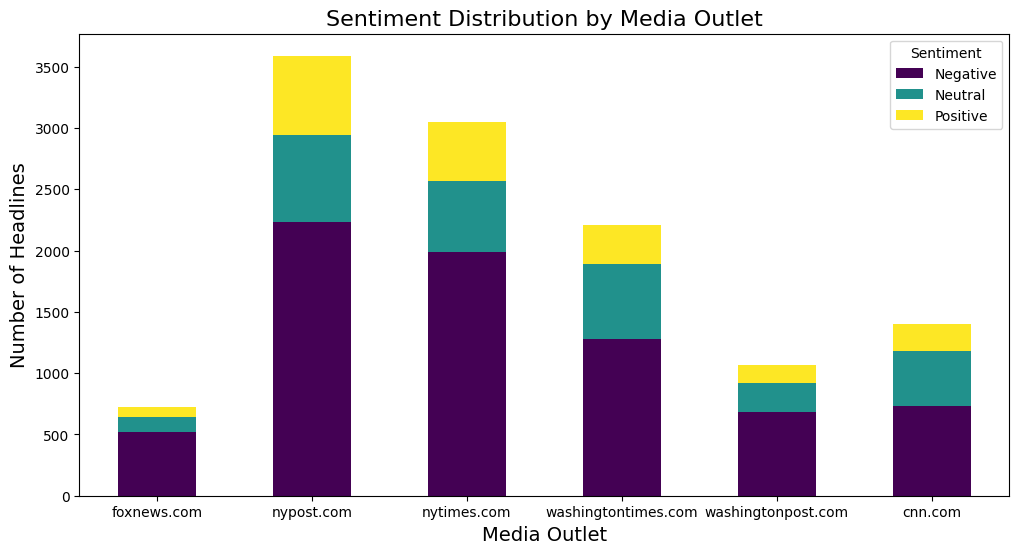

In [13]:
def classify_sentiment(score):
    '''
    Function for the classification of the headlines
    '''
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

data_cleaned['Sentiment Label'] = data_cleaned['Sentiment Score'].apply(classify_sentiment)

#positive, neutral, and negative headlines by media outlet
sentiment_counts = data_cleaned.groupby(['Media Name', 'Sentiment Label']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Headlines", fontsize=14)
plt.title("Sentiment Distribution by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts)), labels=media_counts.index, rotation=0)
plt.legend(title="Sentiment")
plt.show()


Analysis of sentiment regarding different actors:

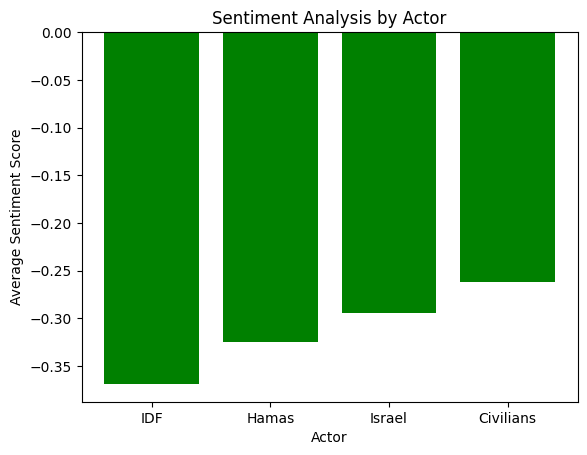

In [14]:
actors = {
    "IDF": "IDF",
    "Hamas": "Hamas",
    "Israel": "Israel|Israeli",
    "Civilians": "civilian|civilians"
}
actor_sentiments = {}
for actor, keyword in actors.items():
    actor_data = data_cleaned[data_cleaned['Title'].str.contains(keyword, case=False, na=False)]
    actor_sentiments[actor] = actor_data['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()

plt.bar(actor_sentiments.keys(), actor_sentiments.values(), color='green')
plt.title("Sentiment Analysis by Actor")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Actor")
plt.show()

This code part calculates the normalized frequency of mentions of specific actors (e.g., "IDF" and "Hamas") in article titles for each media outlet. It starts by counting the total articles per outlet, then filters and counts titles mentioning each actor. These counts are normalized by dividing by the total article counts for each outlet. The results are combined into a DataFrame, and a bar chart is plotted to compare the normalized frequencies of actor mentions across media outlets, with a legend placed outside the plot.

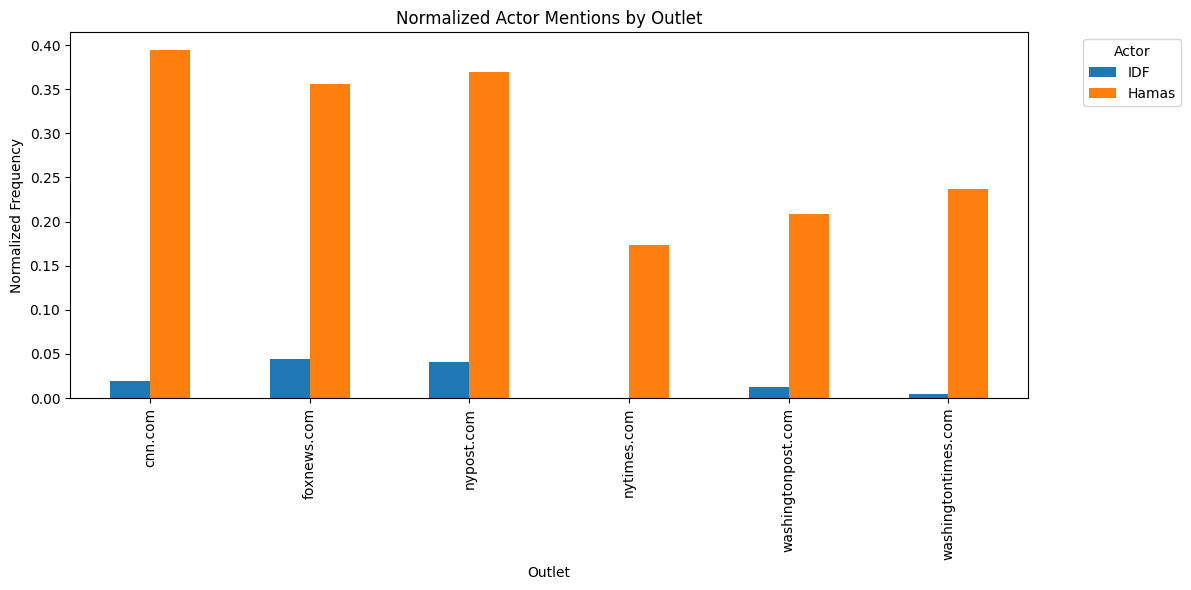

In [15]:
outlet_article_counts = data_cleaned['Media Name'].value_counts().to_dict()

actors = { 'IDF': 'IDF',
        'Hamas': 'Hamas'}

actor_counts = {}
for actor, keyword in actors.items():
    actor_counts[actor] = (
        data_cleaned[data_cleaned['Title'].str.contains(keyword, case=False, na=False)]
        .groupby('Media Name')['Title']
        .count()
        .divide(pd.Series(outlet_article_counts))
    )

# Combine into a DataFrame
actor_counts_df = pd.DataFrame(actor_counts).fillna(0)

# Plot normalized frequencies
actor_counts_df.plot(kind='bar', figsize=(12, 6))
plt.title("Normalized Actor Mentions by Outlet")
plt.xlabel("Outlet")
plt.ylabel("Normalized Frequency")
plt.legend(title="Actor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 1.2 Co-occurence of actors and keywords

This code part analyzes the co-occurrence of actors (e.g., "IDF," "Hamas") and keywords (e.g., "Self Defense," "Terrorism") in article headlines. It extracts mentions using predefined patterns, filters for meaningful actor-keyword pairs, and aggregates the results into a co-occurrence matrix. The matrix is visualized as a heatmap, highlighting the frequency of actor-keyword associations and revealing media framing patterns.

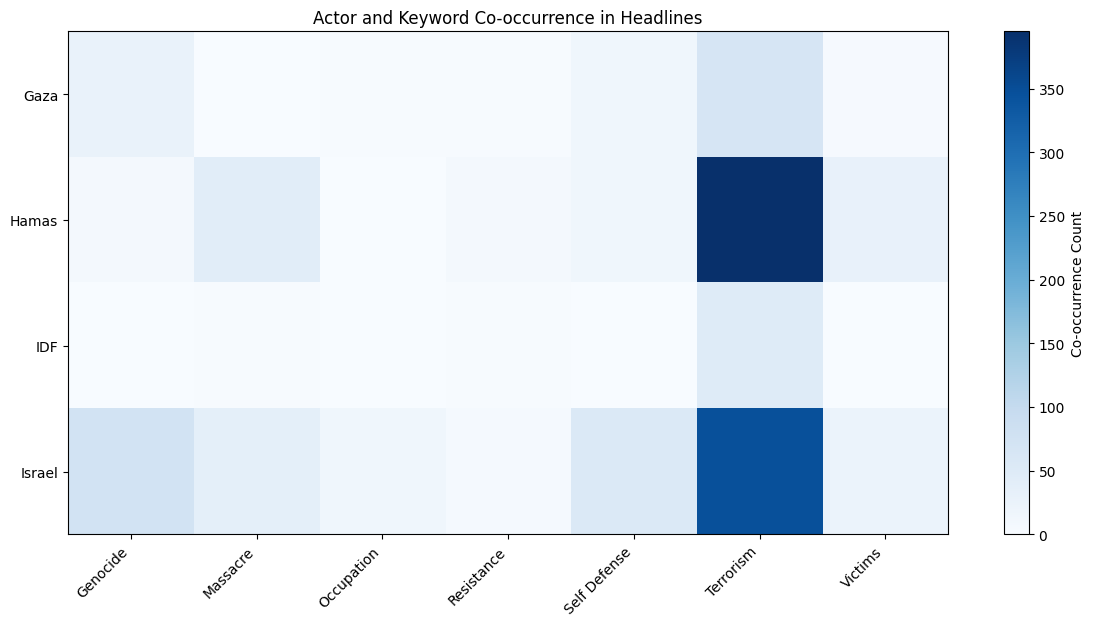

In [16]:
actors = {
    "IDF": "IDF",
    "Hamas": "Hamas",
    "Israel": "Israel|Israeli",
    "Gaza": "Gaza"
}

keywords = {
    "Self Defense": "self-defense|self defence|defense|defence",
    "Terrorism": "terrorist|terrorism|terror",
    "Massacre": "massacre|massacres",
    "Occupation": "occupator|occupation",
    #"Extremism": "extremism|extremist|extremists",
    #"Democracy": "democracy|democratic",
    #"Defense forces": "defense|defense forces",
    "Resistance": "resistance",
    "Victims": "victim|victims",
    #"Innocent": "innocent",
    #"Collateral damage": "collateral damage",
    "Genocide": "genocide|genocidal"
}

# Function to extract mentions of actors and keywords
def extract_keywords_and_terms(text, actor_keywords, term_keywords):
    """
    Extract mentions of both actors and terms from the text.
    """
    extracted = []
    for actor, keyword in actor_keywords.items():
        if pd.notnull(text) and pd.Series([k in text for k in keyword.split('|')]).any():
            extracted.append(actor)
    for term, keyword in term_keywords.items():
        if pd.notnull(text) and pd.Series([k in text for k in keyword.split('|')]).any():
            extracted.append(term)
    return extracted

# Create the column for extracted actors and terms
data_cleaned['Extracted Actors and Terms'] = data_cleaned['Title'].apply(
    lambda x: extract_keywords_and_terms(x, actors, keywords)
)

# Function to filter co-occurrences to only include actor-keyword pairs
def filter_actor_term_cooccurrences(extracted_entities, actors_list, keywords_list):
    """
    Filters co-occurrences to only include pairs where one entity is an actor and the other is a keyword.
    """
    return [
        (actor, keyword)
        for actor in extracted_entities
        for keyword in extracted_entities
        if actor in actors_list and keyword in keywords_list
    ]

# List of actors and keywords for filtering
actor_list = list(actors.keys())
keyword_list = list(keywords.keys())

# Calculate filtered co-occurrences
filtered_co_occurrences = Counter(itertools.chain.from_iterable(
    filter_actor_term_cooccurrences(row, actor_list, keyword_list)
    for row in data_cleaned['Extracted Actors and Terms'] if row
))

# Convert to DataFrame for visualization
filtered_co_occurrence_df = pd.DataFrame(
    [(pair[0], pair[1], count) for pair, count in filtered_co_occurrences.items()],
    columns=['Actor', 'Keyword', 'Co-occurrence Count']
)

# Pivot for heatmap
filtered_co_occurrence_matrix = filtered_co_occurrence_df.pivot(index='Actor', columns='Keyword', values='Co-occurrence Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
plt.imshow(filtered_co_occurrence_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Co-occurrence Count")
plt.xticks(range(len(filtered_co_occurrence_matrix.columns)), filtered_co_occurrence_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(filtered_co_occurrence_matrix.index)), filtered_co_occurrence_matrix.index)
plt.title("Actor and Keyword Co-occurrence in Headlines")
plt.tight_layout()
plt.show()

Now we include Pivot data:

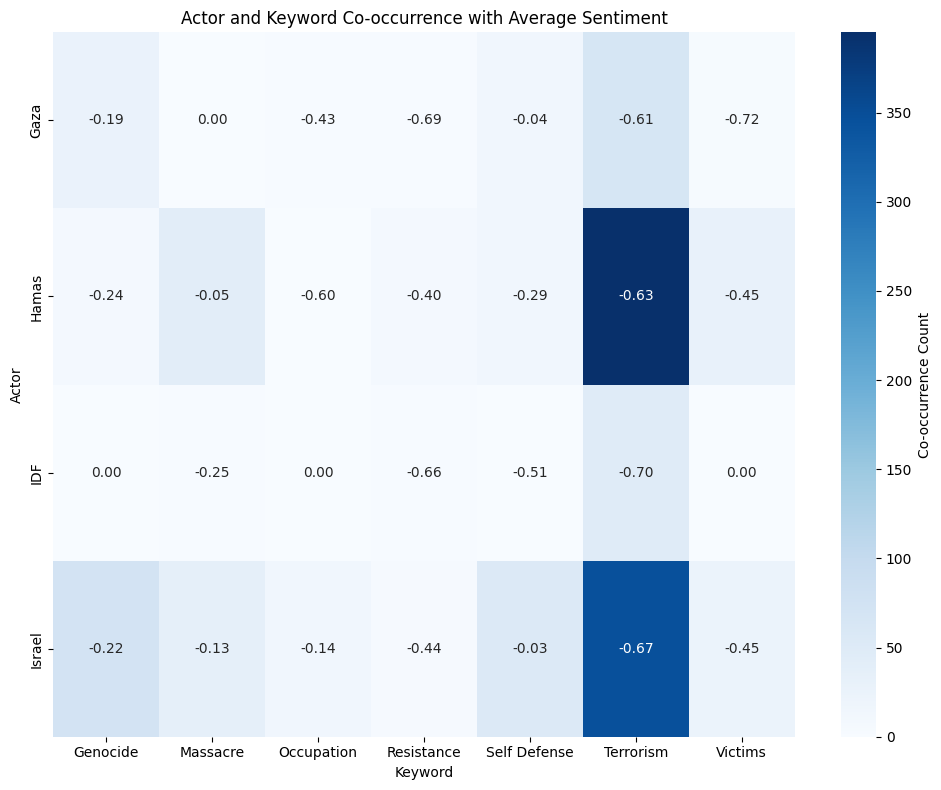

In [17]:
# Actor and keyword dictionaries
actors = {
    "IDF": "IDF",
    "Hamas": "Hamas",
    "Israel": "Israel|Israeli",
    "Gaza": "Gaza"
}

keywords = {
    "Self Defense": "self-defense|self defence|defense|defence",
    "Terrorism": "terrorist|terrorism|terror",
    "Massacre": "massacre|massacres",
    "Occupation": "occupator|occupation",
    #"Defense forces": "defense|defense forces",
    "Resistance": "resistance",
    "Victims": "victim|victims",
    "Genocide": "genocide|genocidal"
}

def extract_keywords_and_terms(text, actor_keywords, term_keywords):
    """
    Extract mentions of actors and keywords
    """
    extracted = []
    if pd.notnull(text):
        for actor, keyword in actor_keywords.items():
            if any(k in text for k in keyword.split('|')):
                extracted.append(actor)
        for term, keyword in term_keywords.items():
            if any(k in text for k in keyword.split('|')):
                extracted.append(term)
    return extracted

# Create a column for extracted actors and terms
data_cleaned['Extracted Actors and Terms'] = data_cleaned['Title'].apply(
    lambda x: extract_keywords_and_terms(x, actors, keywords)
)

def filter_actor_term_cooccurrences(extracted_entities, actors_list, keywords_list):
    """
    Filter co-occurrences to only include actor-keyword pairs
    """
    return [
        (actor, keyword)
        for actor in extracted_entities
        for keyword in extracted_entities
        if actor in actors_list and keyword in keywords_list
    ]

# List of actors and keywords
actor_list = list(actors.keys())
keyword_list = list(keywords.keys())

# Calculate filtered co-occurrences
filtered_co_occurrences = Counter(itertools.chain.from_iterable(
    filter_actor_term_cooccurrences(row, actor_list, keyword_list)
    for row in data_cleaned['Extracted Actors and Terms'] if row
))

def calculate_sentiment_for_cooccurrences(data, actor_keywords, term_keywords, sentiment_analyzer):
    """
    Calculate sentiment for co-occurrences
    """
    sentiment_data = defaultdict(list)
    for _, row in data.iterrows():
        extracted_entities = row['Extracted Actors and Terms']
        if isinstance(extracted_entities, list) and extracted_entities:
            sentiment = sentiment_analyzer.polarity_scores(row['Title'])['compound']
            for actor in actor_keywords.keys():
                for term in term_keywords.keys():
                    if actor in extracted_entities and term in extracted_entities:
                        sentiment_data[(actor, term)].append(sentiment)
    return {pair: np.mean(scores) for pair, scores in sentiment_data.items()}

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate average sentiment for co-occurrences
average_sentiments = calculate_sentiment_for_cooccurrences(
    data_cleaned, actors, keywords, analyzer
)

# Combine co-occurrence counts and sentiment into a single DataFrame
combined_data = []
for pair, count in filtered_co_occurrences.items():
    sentiment = average_sentiments.get(pair, np.nan)
    combined_data.append((*pair, count, sentiment))

combined_df = pd.DataFrame(combined_data, columns=['Actor', 'Keyword', 'Co-occurrence Count', 'Average Sentiment'])

# Pivot data for visualization
count_matrix = combined_df.pivot(index='Actor', columns='Keyword', values='Co-occurrence Count').fillna(0)
sentiment_matrix = combined_df.pivot(index='Actor', columns='Keyword', values='Average Sentiment').fillna(0)

# Plotting the heatmap with overlaid sentiment
plt.figure(figsize=(10, 8))
sns.heatmap(count_matrix, annot=sentiment_matrix, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Co-occurrence Count'})
plt.title("Actor and Keyword Co-occurrence with Average Sentiment")
plt.xlabel("Keyword")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()

Here we calculate the average sentiment for articles published around key events within a 5-day window. It filters the articles by event date, computes the average sentiment, and visualizes the results in a bar chart, showing how sentiment varies around these significant events.

In [18]:
# Define key events with their dates
key_events = {
    "October 7 Attack": "2023-10-07",
    "Al-Ahli Hospital Explosion": "2023-10-17",
    "Rafah Border Bombing": "2023-11-01",
    "Khan Younis Massacre": "2023-12-10",
    "Refugee Camp Airstrike": "2024-07-08"
}

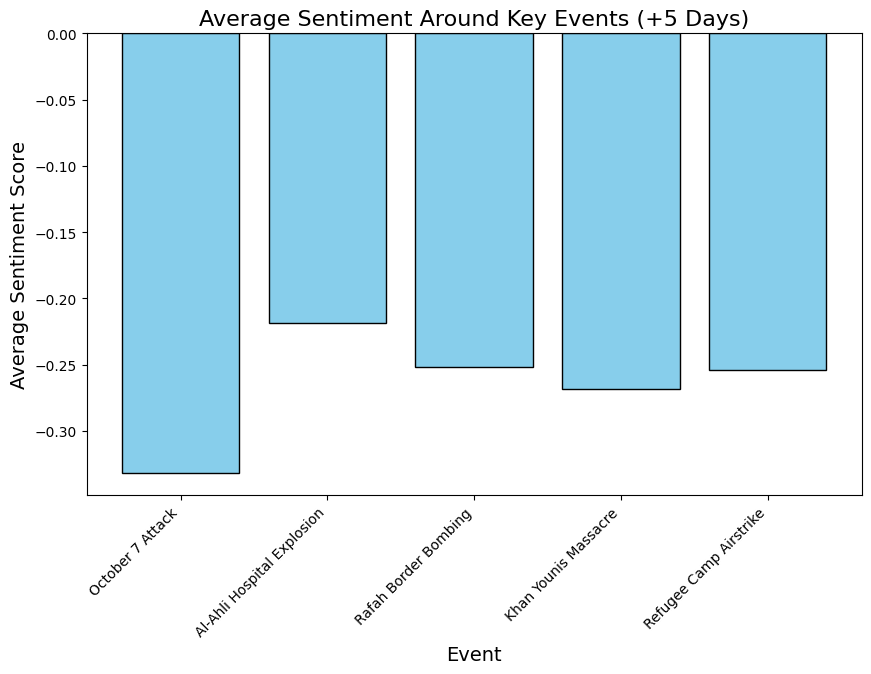

In [19]:
# Create a new DataFrame to store filtered results
event_sentiments = []

for event_name, event_date in key_events.items():
    event_date = pd.to_datetime(event_date)
    time_frame = (data_cleaned['Publish Date'] >= event_date) & (data_cleaned['Publish Date'] <= event_date + pd.Timedelta(days=5))
    event_data = data_cleaned[time_frame]
    
    # Calculate average sentiment for the time frame
    avg_sentiment = event_data['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()
    
    # Append results
    event_sentiments.append({"Event": event_name, "Date": event_date, "Average Sentiment": avg_sentiment})

event_sentiments_df = pd.DataFrame(event_sentiments)


plt.figure(figsize=(10, 6))
plt.bar(event_sentiments_df['Event'], event_sentiments_df['Average Sentiment'], color='skyblue', edgecolor='black')
plt.title("Average Sentiment Around Key Events (+5 Days)", fontsize=16)
plt.xlabel("Event", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

### 1.3 Keyword Analysing

The following visualization helps to highlight the most frequent keywords across media headlines related to the Israel-Palestine conflict. By processing the titles of articles, we extracted the most prominent terms, excluding common stopwords and irrelevant terms. This visualization provides a clear representation of the key themes and topics discussed in the headlines, offering valuable insights into the central narratives surrounding the conflict.

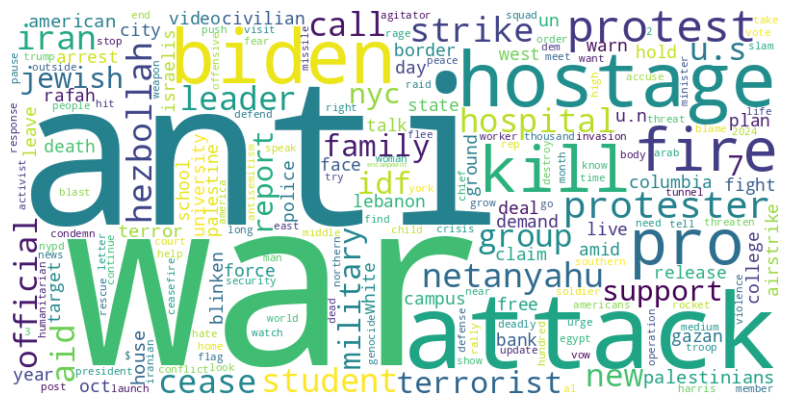

In [20]:
df = data_cleaned
nlp = spacy.load("en_core_web_sm")

#custom_stopwords =r'C:\Users\NejlaHidic\Desktop\Uni\Foundations of CSS\Project\data\cloud, interpolation='bilinear')

custom_stopwords = ['israel', 'hamas', 'gaza', 'israeli', 'palestinian', 'say', 'hama']

def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_ not in custom_stopwords]
    return " ".join(words)

df['Processed Title'] = df['Title'].apply(preprocess_text_spacy)
all_words = " ".join(df['Processed Title']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This code creates a bar chart to visualize the top 10 most frequent words in the dataset, with each word assigned a unique color. It includes a custom legend for word-color mapping and adjusts the layout for better readability.

[('war', 1556), ('anti', 1130), ('attack', 1019), ('hostage', 1004), ('biden', 966), ('pro', 671), ('kill', 665), ('fire', 578), ('protest', 558), ('protester', 540)]


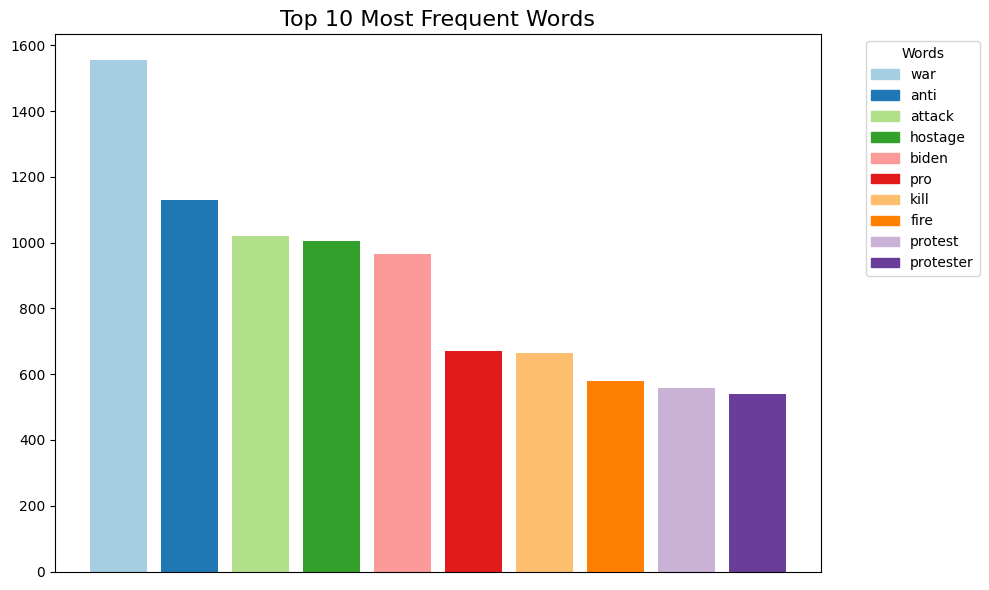

In [21]:
# Get the 10 most common words from the word count dictionary
common_words = word_counts.most_common(10)
print(common_words)

# Separate words and their counts for plotting
words, counts = zip(*common_words)

# Generate a list of colors from the 'Paired' colormap in matplotlib
colors = plt.cm.Paired.colors

# Create a dictionary mapping frames (words) to unique colors
frame_color_dict = {frame: color for frame, color in zip(words, colors)}

# Create a bar chart to display the top 10 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color=colors)
plt.xticks([])
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = words
plt.legend(handles, labels, title="Words", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=1)
plt.title('Top 10 Most Frequent Words', fontsize=16)
plt.tight_layout()
plt.show()

### 1.4 Framing Analysing

Next we identified several key frames based on language and keywords as following:

    1.War Frame
    2.Political / Leadership Frame
    3.Humanitarian / Victimhood Frame
    4.Ideological / Partisan Frame
    5.Security / Military Justification Frame
    6.International Relations Frame
    7.Protest / Civil Disobedience Frame
    8.Media Framing / Narrative Framing

In [22]:
# Define keyword groups for various frames (themes or narratives)
frame_keywords = {
    "War Frame": ["war", "attack", "kill", "hostage", "strike", "fire", "hezbollah", "iran", "netanyahu"],
    "Political / Leadership Frame": ["biden", "netanyahu", "leader", "call", "pro", "student", "aid"],
    "Humanitarian / Victimhood Frame": ["hospital", "aid", "protest", "protester", "victim", "student", "war"],
    "Ideological / Partisan Frame": ["anti", "pro", "biden", "netanyahu", "hezbollah", "iran"],
    "Security / Military Justification Frame": ["defense", "terrorist", "terror", "kill", "strike", "attack"],
    "International Relations Frame": ["biden", "iran", "hezbollah", "netanyahu", "call", "cease"],
    "Protest / Civil Disobedience Frame": ["protest", "protester", "student", "call"],
    "Media Framing / Narrative Framing": ["biden", "call", "aid", "terrorist", "terror", "strike"]
}

def count_frame_keywords(df, frame_keywords):
    """
    Count the occurrences of frame-related keywords in the dataset
    """
    frame_counts = {frame: 0 for frame in frame_keywords}

    for index, row in df.iterrows():
        # Process the title of each article to prepare it for keyword matching
        processed_title = preprocess_text_spacy(row['Title'])

        # Check each frame and its keywords in the processed title
        for frame, keywords in frame_keywords.items():
            for keyword in keywords:
                if keyword in processed_title:
                    frame_counts[frame] += 1
                    break

    return frame_counts

frame_counts = count_frame_keywords(df, frame_keywords)
sorted_frame_counts = sorted(frame_counts.items(), key=lambda x: x[1], reverse=True)
sorted_frames, sorted_counts = zip(*sorted_frame_counts)

print("Sorted frame counts (from largest to smallest):")
for frame, count in sorted_frame_counts:
    print(f"{frame}: {count}")

Sorted frame counts (from largest to smallest):
War Frame: 5594
Ideological / Partisan Frame: 4522
Political / Leadership Frame: 4404
Humanitarian / Victimhood Frame: 4061
Media Framing / Narrative Framing: 2917
International Relations Frame: 2767
Security / Military Justification Frame: 2510
Protest / Civil Disobedience Frame: 1756


This part generates a bar chart visualizing the frequency of keywords associated with different frames. Frames are sorted by frequency in descending order, with distinct colors representing each frame. A legend displays the frame names, while the x-axis labels are omitted for a cleaner visualization.

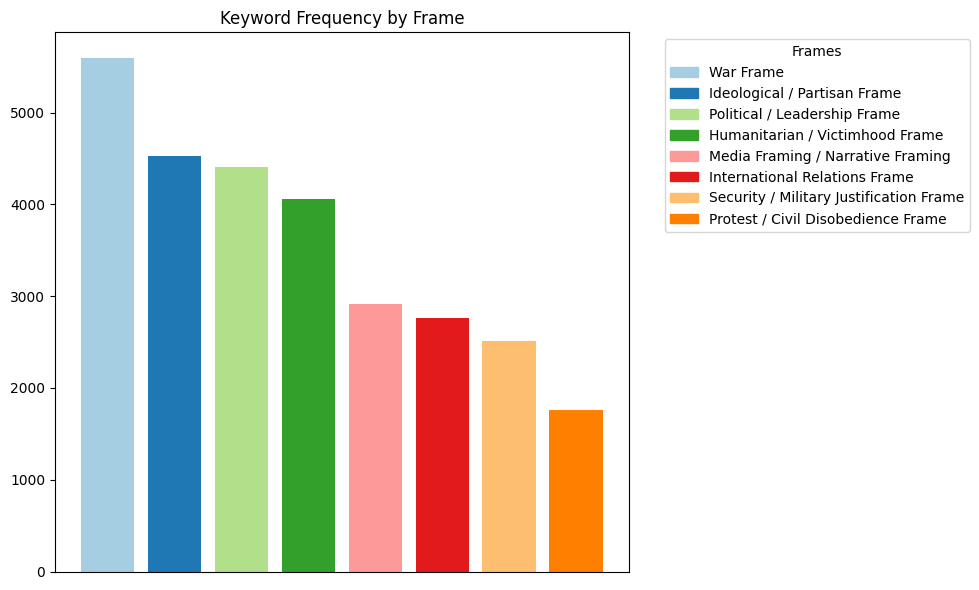

In [23]:
frames = list(frame_counts.keys())
counts = list(frame_counts.values())

frame_count_pairs = list(zip(frames, counts))

sorted_frame_count_pairs = sorted(frame_count_pairs, key=lambda x: x[1], reverse=True)
sorted_frames, sorted_counts = zip(*sorted_frame_count_pairs)

sorted_colors = plt.cm.Paired.colors[:len(sorted_frames)]

plt.figure(figsize=(10, 6))
plt.bar(sorted_frames, sorted_counts, color=sorted_colors)
plt.xticks([])
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sorted_colors]
plt.legend(handles, sorted_frames, title="Frames", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Keyword Frequency by Frame')
plt.tight_layout()
plt.show()

This part visualizes the percentage distribution of keyword frequencies across frames using a pie chart. Frames are sorted by percentage, with each slice representing a frame labeled with its name and percentage, highlighting the most prominent frames in the text.

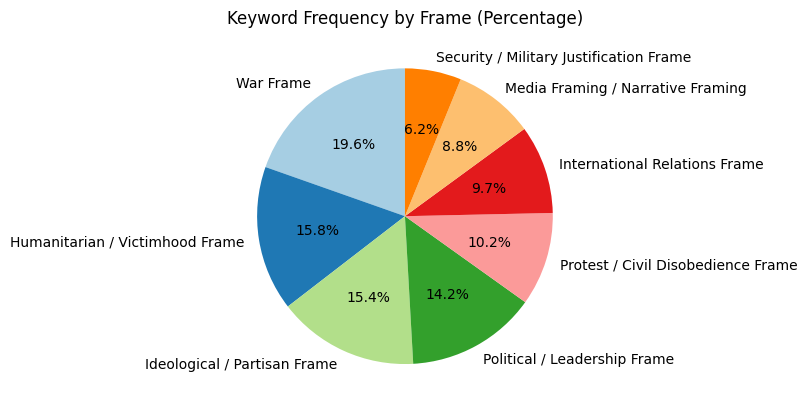

In [24]:
total_count = sum(counts)
percentages = [(count / total_count) * 100 for count in counts]
frame_percentage_pairs = list(zip(sorted_frames, percentages))

# Sort the frames and their percentages in descending order based on percentage
sorted_frame_percentage_pairs = sorted(frame_percentage_pairs, key=lambda x: x[1], reverse=True)

# Unpack the sorted frame names and percentages for further use or plotting
sorted_frames, sorted_percentages = zip(*sorted_frame_percentage_pairs)

plt.pie(sorted_percentages, labels=sorted_frames, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Keyword Frequency by Frame (Percentage)')
plt.show()

## 2 Emotional tone

This part performs emotion analysis on media headlines using a pre-trained model, extracting emotion scores for each headline. Actors are identified using predefined keywords and paired with their respective emotion scores. The data is grouped by actors and media outlets to calculate average emotion scores, enabling comparative analysis. Visualizations include a bar chart showcasing the average emotional tones by actor and a heatmap displaying specific emotions (e.g., joy) across actors and media outlets.

In [ ]:
# Initialize emotion analysis pipeline
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Analyze emotions for all headlines
def analyze_emotions(text, emotion_analyzer):
    """
    Analyze emotions for a given text and return scores for each emotion.
    """
    if pd.notnull(text):
        emotions = emotion_analyzer(text)
        return {e['label']: e['score'] for e in emotions[0]}
    return {}

# Apply emotion analysis and extract actors
data_cleaned['Emotion Scores'] = data_cleaned['Title'].apply(lambda x: analyze_emotions(x, emotion_analyzer))
data_cleaned['Extracted Actors'] = data_cleaned['Title'].apply(lambda x: extract_keywords_and_terms(x, actors, {}))

# Convert emotion scores into separate columns
emotion_df = pd.json_normalize(data_cleaned['Emotion Scores'])
emotion_df['Media Outlet'] = data_cleaned['Outlet']  # Add media outlet for grouping
emotion_df['Actors'] = data_cleaned['Extracted Actors']  # Add extracted actors
emotion_df['Title'] = data_cleaned['Title']  # Add original title

# Explode actors into separate rows for analysis
emotion_df = emotion_df.explode('Actors').dropna(subset=['Actors'])

# Group by actor and media outlet to calculate average emotion scores
actor_emotion_by_outlet = emotion_df.groupby(['Actors', 'Media Outlet']).mean().reset_index()

# Visualization 1: Bar plot for emotional tones by actor
plt.figure(figsize=(12, 6))
actor_emotion_by_outlet.groupby('Actors').mean().drop(columns=['Media Outlet']).plot(kind='bar', figsize=(12, 6))
plt.title("Average Emotional Tone by Actor")
plt.ylabel("Average Emotion Score")
plt.xlabel("Emotion")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Visualization 2: Heatmap for actors and emotions by outlet
actor_outlet_emotion = actor_emotion_by_outlet.pivot_table(
    index='Actors', columns='Media Outlet', values='joy'  # Change 'joy' to analyze different emotions
).fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(actor_outlet_emotion, cmap='coolwarm', annot=True, cbar_kws={'label': 'Average Joy Score'})
plt.title("Emotion (Joy) by Actor and Media Outlet")
plt.xlabel("Media Outlet")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()

This part analyzes the use of passive and active voice in media headlines. Using SpaCy's natural language processing capabilities, it identifies whether each headline is written in passive or active voice. The analysis includes: 

1. A bar chart showing the overall distribution of passive vs. active voice across all headlines.  
2. A stacked bar chart comparing the frequency of passive and active voice usage by actors extracted from the headlines.  
3. A similar visualization showcasing passive vs. active voice usage by media outlets.  

These insights help identify patterns in voice choice that may influence the framing of news narratives.

In [ ]:
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to determine passive or active voice
def is_passive(text):
    """
    Determine if a sentence is in passive voice.
    Returns True for passive, False for active.
    """
    doc = nlp(text)
    for token in doc:
        # Look for auxiliary verbs indicating passive voice
        if token.dep_ == "auxpass":
            return True
    return False

# Apply passive/active detection
data_cleaned['Voice'] = data_cleaned['Title'].apply(lambda x: 'Passive' if is_passive(x) else 'Active')

# Count passive vs. active usage overall
voice_counts = data_cleaned['Voice'].value_counts()

# Plot passive vs. active voice distribution
plt.figure(figsize=(8, 6))
voice_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Passive vs. Active Voice")
plt.xlabel("Voice")
plt.ylabel("Number of Headlines")
plt.tight_layout()
plt.show()

# Analyze passive vs. active voice by actor
data_cleaned['Extracted Actors'] = data_cleaned['Title'].apply(lambda x: extract_keywords_and_terms(x, actors, {}))
actor_voice_data = data_cleaned.explode('Extracted Actors').dropna(subset=['Extracted Actors'])

actor_voice_counts = actor_voice_data.groupby(['Extracted Actors', 'Voice']).size().unstack(fill_value=0)

# Plot passive vs. active voice by actor
actor_voice_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Passive vs. Active Voice by Actor")
plt.ylabel("Number of Headlines")
plt.xlabel("Actor")
plt.legend(title="Voice", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Analyze passive vs. active voice by media outlet
outlet_voice_counts = data_cleaned.groupby(['Outlet', 'Voice']).size().unstack(fill_value=0)

# Plot passive vs. active voice by media outlet
outlet_voice_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])
plt.title("Passive vs. Active Voice by Media Outlet")
plt.ylabel("Number of Headlines")
plt.xlabel("Media Outlet")
plt.legend(title="Voice", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()